# Estudaremos os casos confirmados de COVID

## Fonte GITHUB da Johns Hopkins

### site: https://github.com/CSSEGISandData

# Primeira parte

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

In [2]:
confirmed = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
deaths = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
recovered = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")

### Análise dos casos confirmados

In [3]:
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,24766,25527,26310,26874,27532,27878,28424,28833,29157,29481
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1521,1590,1672,1722,1788,1838,1891,1962,1995,2047
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,10919,11031,11147,11268,11385,11504,11631,11771,11920,12076
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,853,853,854,854,855,855,855,855,855,855
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,140,142,148,155,166,172,176,183,186,189


In [4]:
confirmed.shape

(266, 158)

In [5]:
# forma de mudar automaticamente o ultimo dia
last_day_colunas = confirmed.columns[[-1]]
last_day_colunas[0]

'6/23/20'

In [6]:
last_date = last_day_colunas[0]
confirmed[last_date]

0      29481
1       2047
2      12076
3        855
4        189
       ...  
261      707
262      992
263      265
264     5567
265       17
Name: 6/23/20, Length: 266, dtype: int64

In [7]:
confirmed['Country/Region']

0                Afghanistan
1                    Albania
2                    Algeria
3                    Andorra
4                     Angola
               ...          
261    Sao Tome and Principe
262                    Yemen
263                  Comoros
264               Tajikistan
265                  Lesotho
Name: Country/Region, Length: 266, dtype: object

In [8]:
confirmed['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Diamond Princess', 'Cuba', 'Cyprus',
       'Czechia', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary',
       'Iceland', 'India

In [9]:
confirmed['Province/State'].unique()

array([nan, 'Australian Capital Territory', 'New South Wales',
       'Northern Territory', 'Queensland', 'South Australia', 'Tasmania',
       'Victoria', 'Western Australia', 'Alberta', 'British Columbia',
       'Grand Princess', 'Manitoba', 'New Brunswick',
       'Newfoundland and Labrador', 'Nova Scotia', 'Ontario',
       'Prince Edward Island', 'Quebec', 'Saskatchewan', 'Anhui',
       'Beijing', 'Chongqing', 'Fujian', 'Gansu', 'Guangdong', 'Guangxi',
       'Guizhou', 'Hainan', 'Hebei', 'Heilongjiang', 'Henan', 'Hong Kong',
       'Hubei', 'Hunan', 'Inner Mongolia', 'Jiangsu', 'Jiangxi', 'Jilin',
       'Liaoning', 'Macau', 'Ningxia', 'Qinghai', 'Shaanxi', 'Shandong',
       'Shanghai', 'Shanxi', 'Sichuan', 'Tianjin', 'Tibet', 'Xinjiang',
       'Yunnan', 'Zhejiang', 'Faroe Islands', 'Greenland',
       'French Guiana', 'French Polynesia', 'Guadeloupe', 'Mayotte',
       'New Caledonia', 'Reunion', 'Saint Barthelemy', 'St Martin',
       'Martinique', 'Aruba', 'Curacao', 'Sint

In [10]:
# usar número para pegar a linha
confirmed.iloc[0]

Province/State            NaN
Country/Region    Afghanistan
Lat                        33
Long                       65
1/22/20                     0
                     ...     
6/19/20                 27878
6/20/20                 28424
6/21/20                 28833
6/22/20                 29157
6/23/20                 29481
Name: 0, Length: 158, dtype: object

In [11]:
confirmed.iloc[1]

Province/State        NaN
Country/Region    Albania
Lat               41.1533
Long              20.1683
1/22/20                 0
                   ...   
6/19/20              1838
6/20/20              1891
6/21/20              1962
6/22/20              1995
6/23/20              2047
Name: 1, Length: 158, dtype: object

In [12]:
# para usar o indice usamos o iloc
confirmed.set_index('Province/State')

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20
Province/State,,,,,,,,,,,,,,,,,,,,,
NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,0,...,24766,25527,26310,26874,27532,27878,28424,28833,29157,29481
NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,...,1521,1590,1672,1722,1788,1838,1891,1962,1995,2047
NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,...,10919,11031,11147,11268,11385,11504,11631,11771,11920,12076
NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,...,853,853,854,854,855,855,855,855,855,855
NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,...,140,142,148,155,166,172,176,183,186,189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,0,...,661,662,671,683,688,693,698,698,702,707
NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,...,728,844,885,902,909,919,922,941,967,992
NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,0,...,176,176,197,197,210,210,247,247,247,265


In [13]:
# para usar o indice usamos o iloc
confirmed.set_index('Province/State').iloc[10]

Country/Region    Australia
Lat                -12.4634
Long                130.846
1/22/20                   0
1/23/20                   0
                    ...    
6/19/20                  29
6/20/20                  29
6/21/20                  29
6/22/20                  29
6/23/20                  29
Name: Northern Territory, Length: 157, dtype: object

In [14]:
# contagem de estados/províncias
confirmed['Province/State'].value_counts()

Jiangxi              1
Guangxi              1
Jiangsu              1
Qinghai              1
Curacao              1
                    ..
Diamond Princess     1
Victoria             1
Tianjin              1
Greenland            1
Western Australia    1
Name: Province/State, Length: 81, dtype: int64

In [15]:
# contagem de país/região
confirmed['Country/Region'].value_counts()

China                               33
Canada                              14
France                              11
United Kingdom                      11
Australia                            8
                                    ..
Saint Vincent and the Grenadines     1
Zimbabwe                             1
Cabo Verde                           1
Laos                                 1
Mauritius                            1
Name: Country/Region, Length: 188, dtype: int64

In [16]:
confirmed.groupby('Country/Region').sum()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.000000,65.000000,0,0,0,0,0,0,0,0,...,24766,25527,26310,26874,27532,27878,28424,28833,29157,29481
Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,...,1521,1590,1672,1722,1788,1838,1891,1962,1995,2047
Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,...,10919,11031,11147,11268,11385,11504,11631,11771,11920,12076
Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,...,853,853,854,854,855,855,855,855,855,855
Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,...,140,142,148,155,166,172,176,183,186,189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,0,...,492,505,514,555,600,675,784,833,1001,1169
Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,0,0,...,9,9,9,9,9,9,9,9,10,10
Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,...,728,844,885,902,909,919,922,941,967,992


In [17]:
confirmed_by_country = confirmed.groupby('Country/Region').sum()
confirmed_by_country.head()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,...,24766,25527,26310,26874,27532,27878,28424,28833,29157,29481
Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,...,1521,1590,1672,1722,1788,1838,1891,1962,1995,2047
Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,...,10919,11031,11147,11268,11385,11504,11631,11771,11920,12076
Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,...,853,853,854,854,855,855,855,855,855,855
Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,...,140,142,148,155,166,172,176,183,186,189


In [18]:
confirmed_by_country.loc["Brazil"]

Lat       -1.423500e+01
Long      -5.192530e+01
1/22/20    0.000000e+00
1/23/20    0.000000e+00
1/24/20    0.000000e+00
               ...     
6/19/20    1.032913e+06
6/20/20    1.067579e+06
6/21/20    1.083341e+06
6/22/20    1.106470e+06
6/23/20    1.145906e+06
Name: Brazil, Length: 156, dtype: float64

In [19]:
confirmed_by_country.loc["China"]

Lat         1083.3367
Long        3684.4197
1/22/20      548.0000
1/23/20      643.0000
1/24/20      920.0000
              ...    
6/19/20    84494.0000
6/20/20    84553.0000
6/21/20    84572.0000
6/22/20    84624.0000
6/23/20    84653.0000
Name: China, Length: 156, dtype: float64

In [20]:
# todos os casos no Brasil tirando latitude e longitude
confirmed_by_country.loc["Brazil"][2:]

1/22/20          0.0
1/23/20          0.0
1/24/20          0.0
1/25/20          0.0
1/26/20          0.0
             ...    
6/19/20    1032913.0
6/20/20    1067579.0
6/21/20    1083341.0
6/22/20    1106470.0
6/23/20    1145906.0
Name: Brazil, Length: 154, dtype: float64

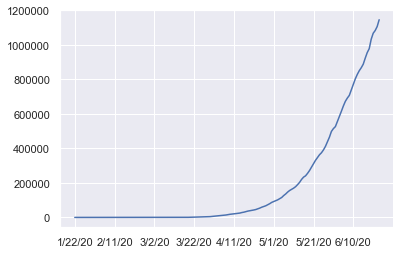

In [21]:
confirmed_by_country.loc["Brazil"][2:].plot()

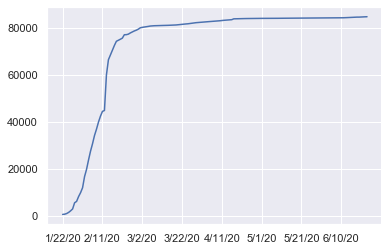

In [22]:
confirmed_by_country.loc["China"][2:].plot()

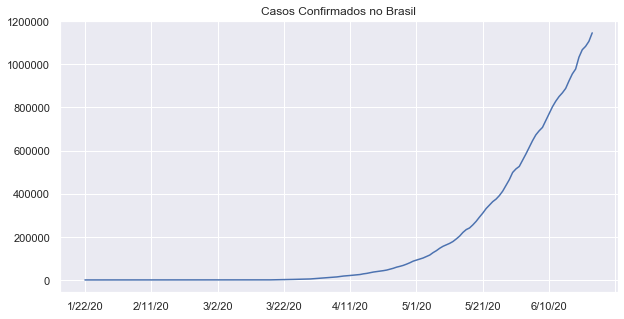

In [23]:
plt.figure(figsize=(10,5))
confirmed_by_country.loc["Brazil"][2:].plot()
plt.title("Casos Confirmados no Brasil")
plt.show()

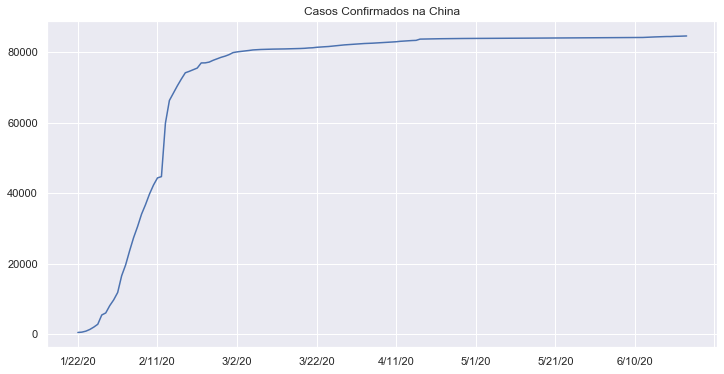

In [24]:
plt.figure(figsize=(12,6))
confirmed_by_country.loc["China"][2:].plot()
plt.title("Casos Confirmados na China")
plt.show()

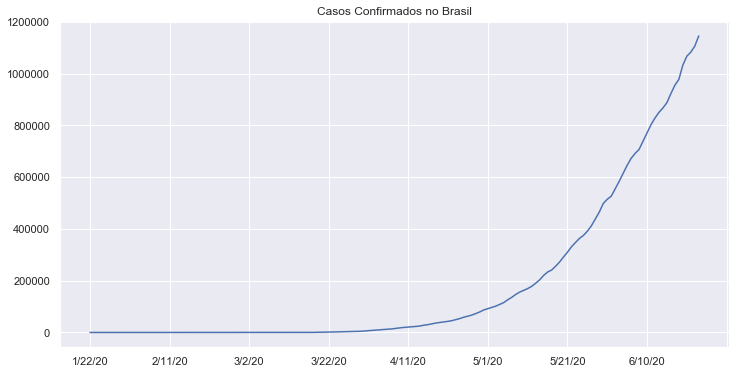

In [25]:
plt.figure(figsize=(12,6))
confirmed_by_country.loc["Brazil"][2:].plot()
plt.title("Casos Confirmados no Brasil")
plt.show()

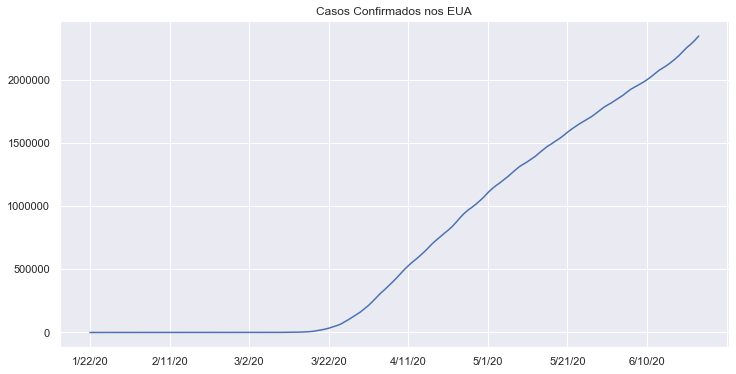

In [26]:
plt.figure(figsize=(12,6))
confirmed_by_country.loc["US"][2:].plot()
plt.title("Casos Confirmados nos EUA")
plt.show()

### Se diminuir o gráfico a aparência fica dando a impressão errada da verdade

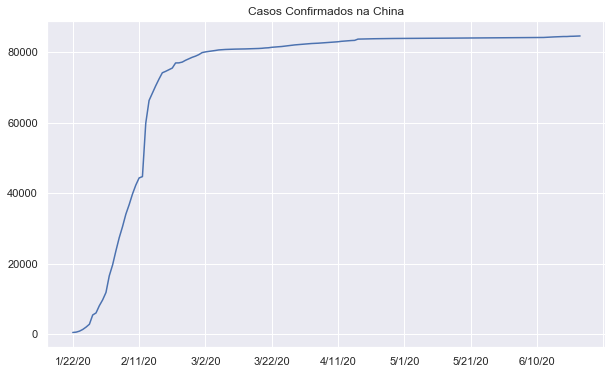

In [27]:
plt.figure(figsize=(10,6))
confirmed_by_country.loc["China"][2:].plot()
plt.title("Casos Confirmados na China")
plt.show()

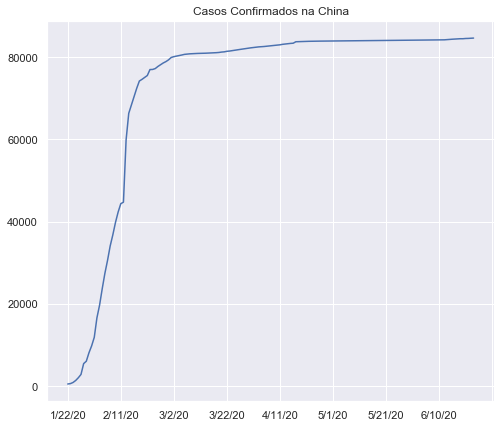

In [28]:
plt.figure(figsize=(8,7))
confirmed_by_country.loc["China"][2:].plot()
plt.title("Casos Confirmados na China")
plt.show()

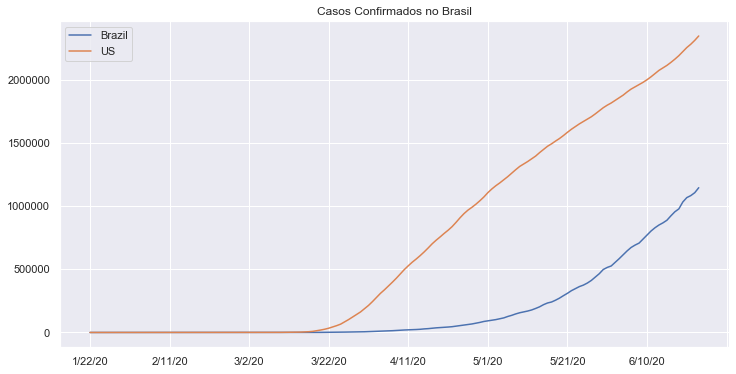

In [29]:
plt.figure(figsize=(12,6))
confirmed_by_country.loc["Brazil"][2:].plot()
confirmed_by_country.loc["US"][2:].plot()
plt.title("Casos Confirmados no Brasil")
plt.legend()
plt.show()

### se diminuir a largura do gráfico, a inclinação dos dados muda e os dados de tempo também

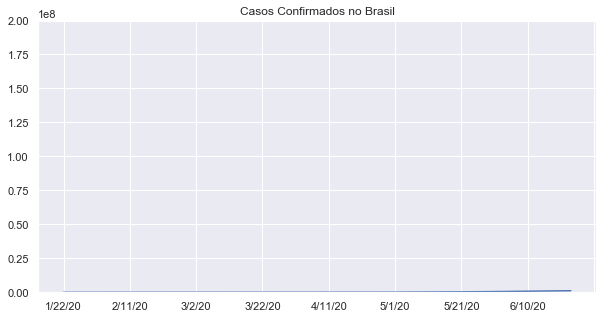

In [30]:
plt.figure(figsize=(10,5))
confirmed_by_country.loc["Brazil"][2:].plot()
plt.title("Casos Confirmados no Brasil")
plt.ylim(0, 200000000)
plt.show()

### Outra forma de mentir com o gráfico seria manipulando os limites do eixo Y
### No caso, estamos usando o eixo Y com o tamanho da população do Brasil

---

### Análise breve das mortes

In [31]:
death_by_country = deaths.groupby('Country/Region').sum()
death_by_country.head()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,...,471,478,491,504,546,548,569,581,598,618
Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,...,36,36,37,38,39,42,43,44,44,45
Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,...,767,777,788,799,811,825,837,845,852,861
Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,...,51,51,52,52,52,52,52,52,52,52
Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,...,6,6,6,7,8,8,9,9,10,10


In [32]:
death_by_country.loc["Brazil"]

Lat          -14.2350
Long         -51.9253
1/22/20        0.0000
1/23/20        0.0000
1/24/20        0.0000
              ...    
6/19/20    48954.0000
6/20/20    49976.0000
6/21/20    50591.0000
6/22/20    51271.0000
6/23/20    52645.0000
Name: Brazil, Length: 156, dtype: float64

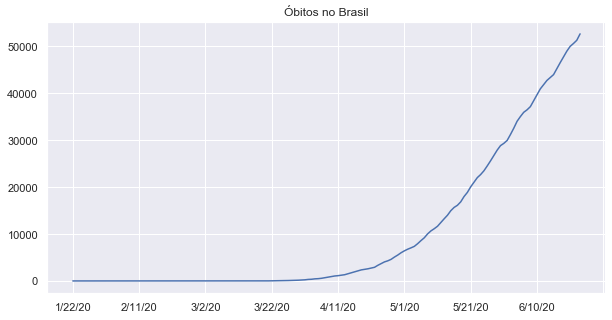

In [33]:
plt.figure(figsize=(10,5))
death_by_country.loc["Brazil"][2:].plot()
plt.title("Óbitos no Brasil")
plt.show()

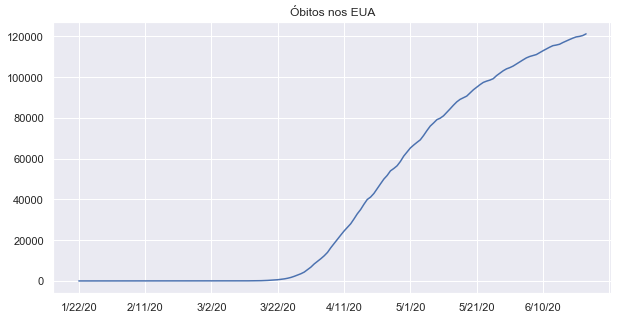

In [34]:
plt.figure(figsize=(10,5))
death_by_country.loc["US"][2:].plot()
plt.title("Óbitos nos EUA")
plt.show()

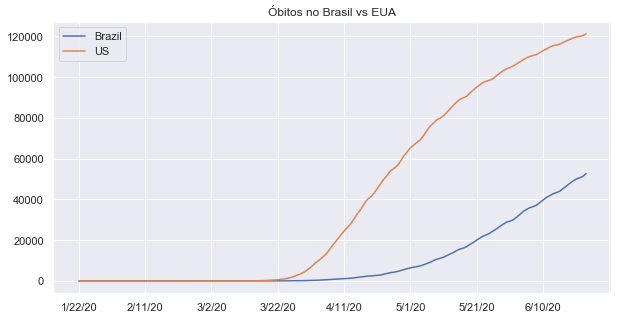

In [35]:
plt.figure(figsize=(10,5))
death_by_country.loc["Brazil"][2:].plot()
death_by_country.loc["US"][2:].plot()
plt.title("Óbitos no Brasil vs EUA")
plt.legend()
plt.show()

***

# Com os gráficos anteriores podemos observar que os dados são cumulativos

In [36]:
# maneira de fazer a diferença entre os registros
confirmed_by_country.loc["Brazil"][2:].diff()

1/22/20        NaN
1/23/20        0.0
1/24/20        0.0
1/25/20        0.0
1/26/20        0.0
            ...   
6/19/20    54771.0
6/20/20    34666.0
6/21/20    15762.0
6/22/20    23129.0
6/23/20    39436.0
Name: Brazil, Length: 154, dtype: float64

In [37]:
new_cases_brazil = confirmed_by_country.loc["Brazil"][2:].diff().dropna()
new_cases_brazil

1/23/20        0.0
1/24/20        0.0
1/25/20        0.0
1/26/20        0.0
1/27/20        0.0
            ...   
6/19/20    54771.0
6/20/20    34666.0
6/21/20    15762.0
6/22/20    23129.0
6/23/20    39436.0
Name: Brazil, Length: 153, dtype: float64

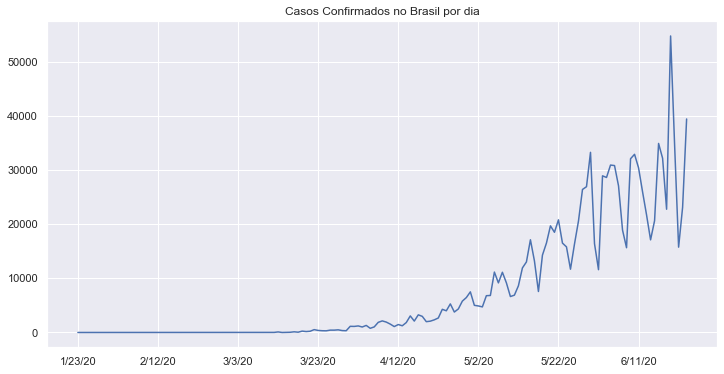

In [38]:
plt.figure(figsize=(12,6))
new_cases_brazil.plot()
plt.title("Casos Confirmados no Brasil por dia")
plt.show()

In [39]:
new_cases_china = confirmed_by_country.loc["China"][2:].diff().dropna()
new_cases_china

1/23/20     95.0
1/24/20    277.0
1/25/20    486.0
1/26/20    669.0
1/27/20    802.0
           ...  
6/19/20      0.0
6/20/20     59.0
6/21/20     19.0
6/22/20     52.0
6/23/20     29.0
Name: China, Length: 153, dtype: float64

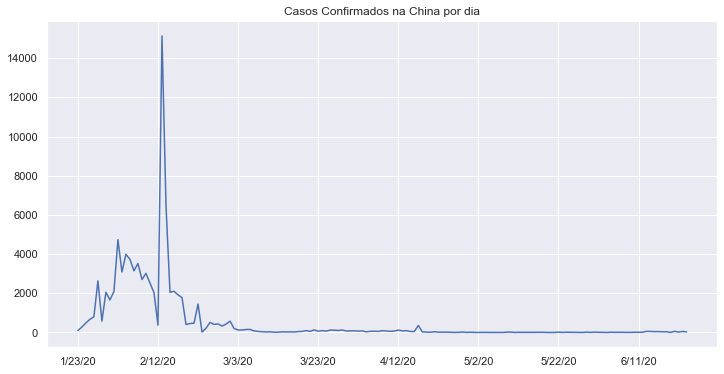

In [40]:
plt.figure(figsize=(12,6))
new_cases_china.plot()
plt.title("Casos Confirmados na China por dia")
plt.show()

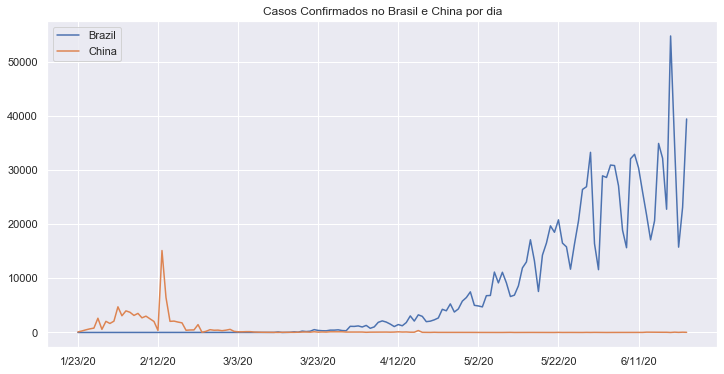

In [41]:
plt.figure(figsize=(12,6))
new_cases_brazil.plot()
new_cases_china.plot()
plt.title("Casos Confirmados no Brasil e China por dia")
plt.legend()
plt.show()

In [42]:
new_cases_USA = confirmed_by_country.loc["US"][2:].diff().dropna()
new_cases_USA

1/23/20        0.0
1/24/20        1.0
1/25/20        0.0
1/26/20        3.0
1/27/20        0.0
            ...   
6/19/20    31527.0
6/20/20    32718.0
6/21/20    26358.0
6/22/20    30647.0
6/23/20    34720.0
Name: US, Length: 153, dtype: float64

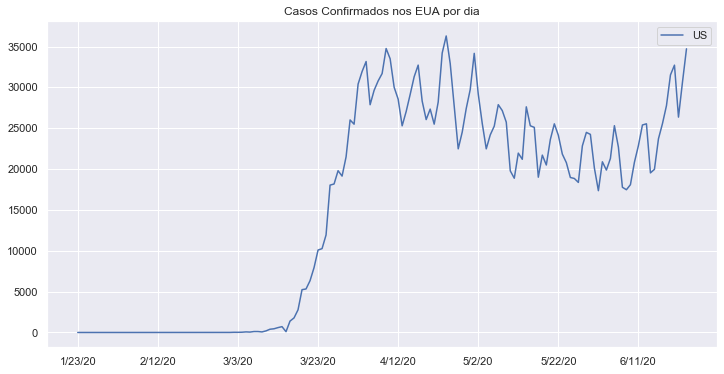

In [43]:
plt.figure(figsize=(12,6))
new_cases_USA.plot()
plt.title("Casos Confirmados nos EUA por dia")
plt.legend()
plt.show()

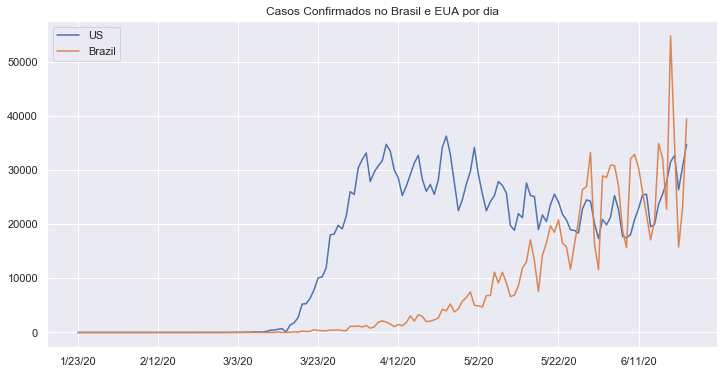

In [44]:
plt.figure(figsize=(12,6))
new_cases_USA.plot()
new_cases_brazil.plot()
plt.title("Casos Confirmados no Brasil e EUA por dia")
plt.legend(loc='upper left')
plt.show()

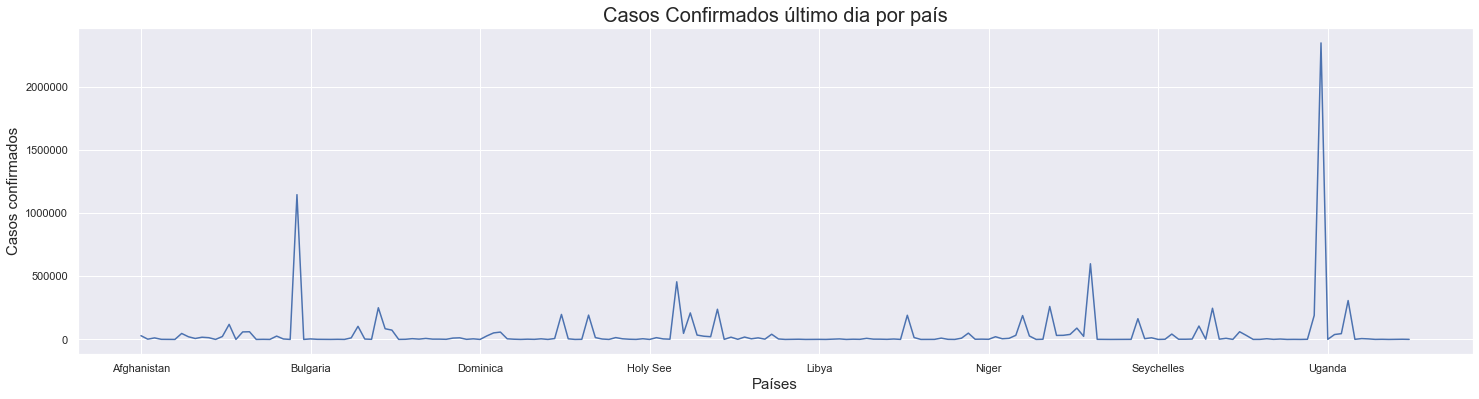

In [45]:
plt.figure(figsize=(25,6))
confirmed_by_country[last_date].plot()
plt.title("Casos Confirmados último dia por país", fontsize=20)
plt.xlabel("Países", fontsize=15)
plt.ylabel("Casos confirmados", fontsize=15)
plt.show()

### Esse gráfico fica muito ruim para identificar os países ou valores

---

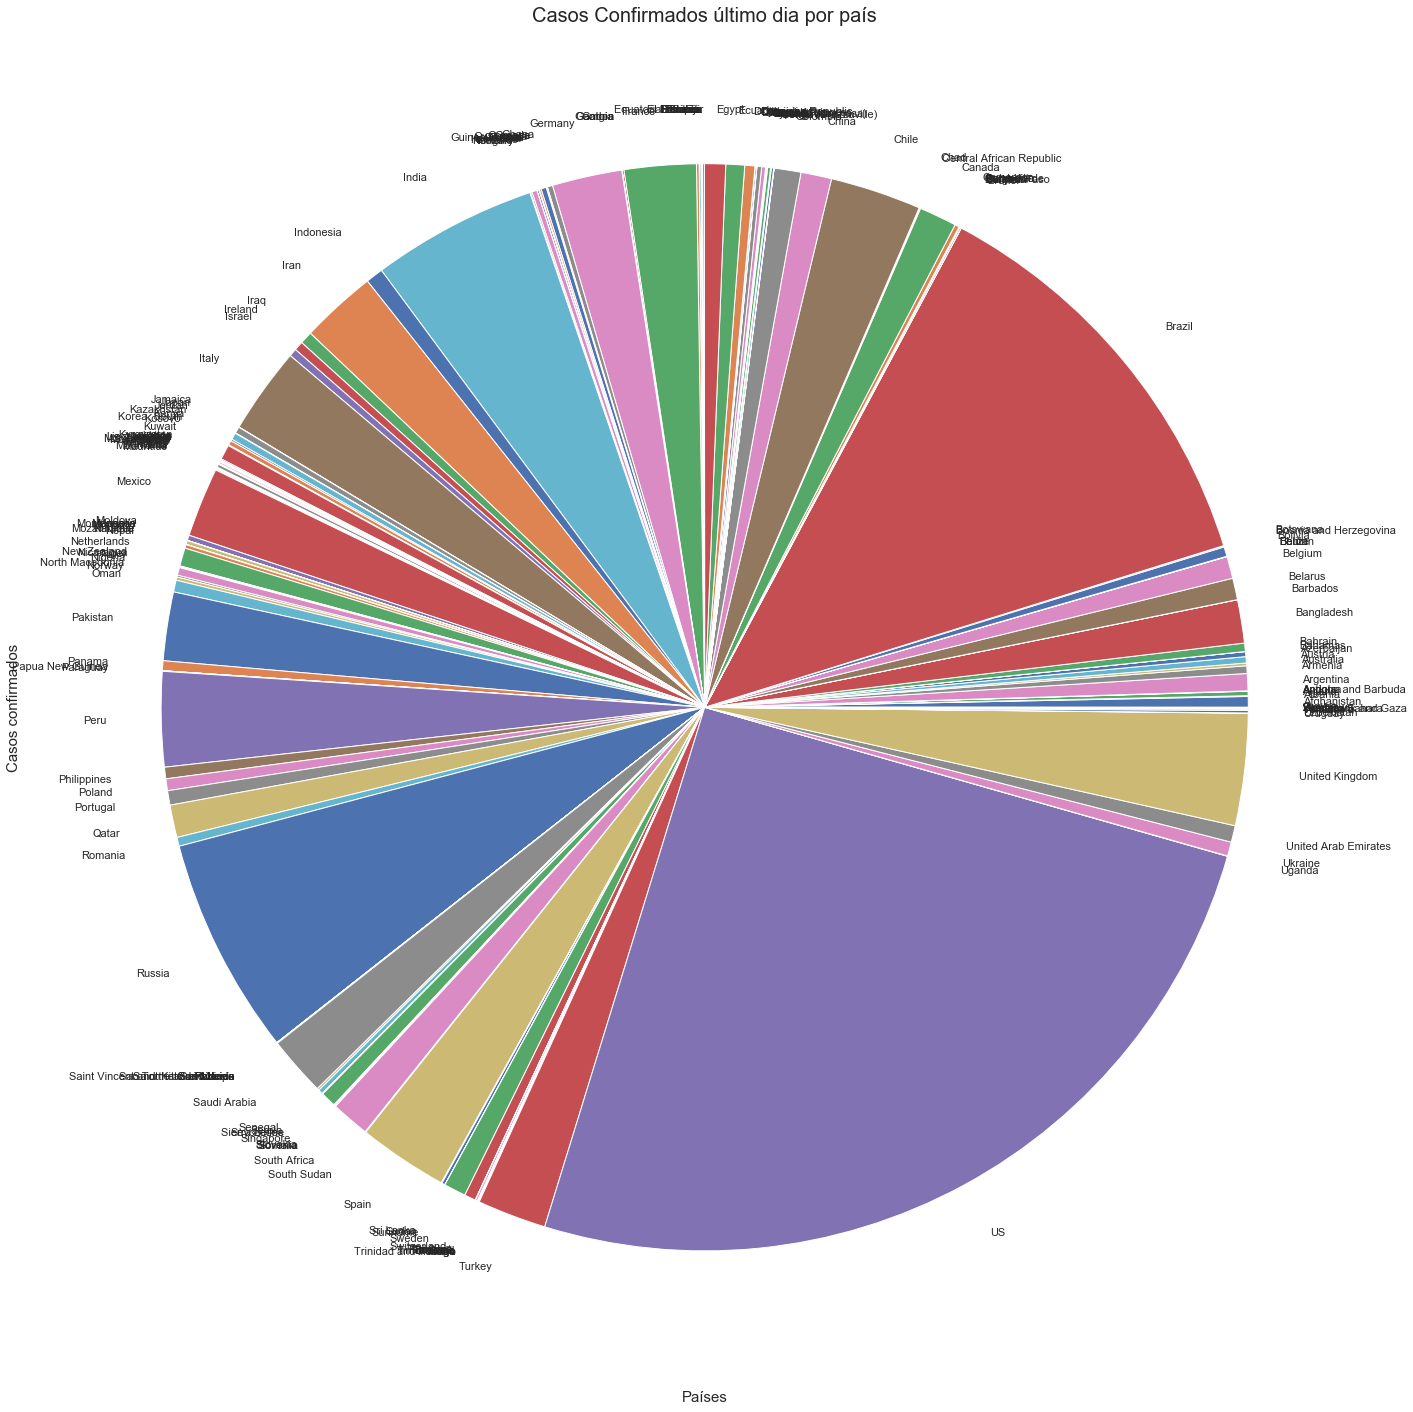

In [46]:
plt.figure(figsize=(25,25))
confirmed_by_country[last_date].plot(kind='pie')
plt.title("Casos Confirmados último dia por país", fontsize=20)
plt.xlabel("Países", fontsize=15)
plt.ylabel("Casos confirmados", fontsize=15)
plt.show()

## Impossível usar o gráfico pizza/torta


---

## Melhor gráfico para essa proposta é o gráfico de barra

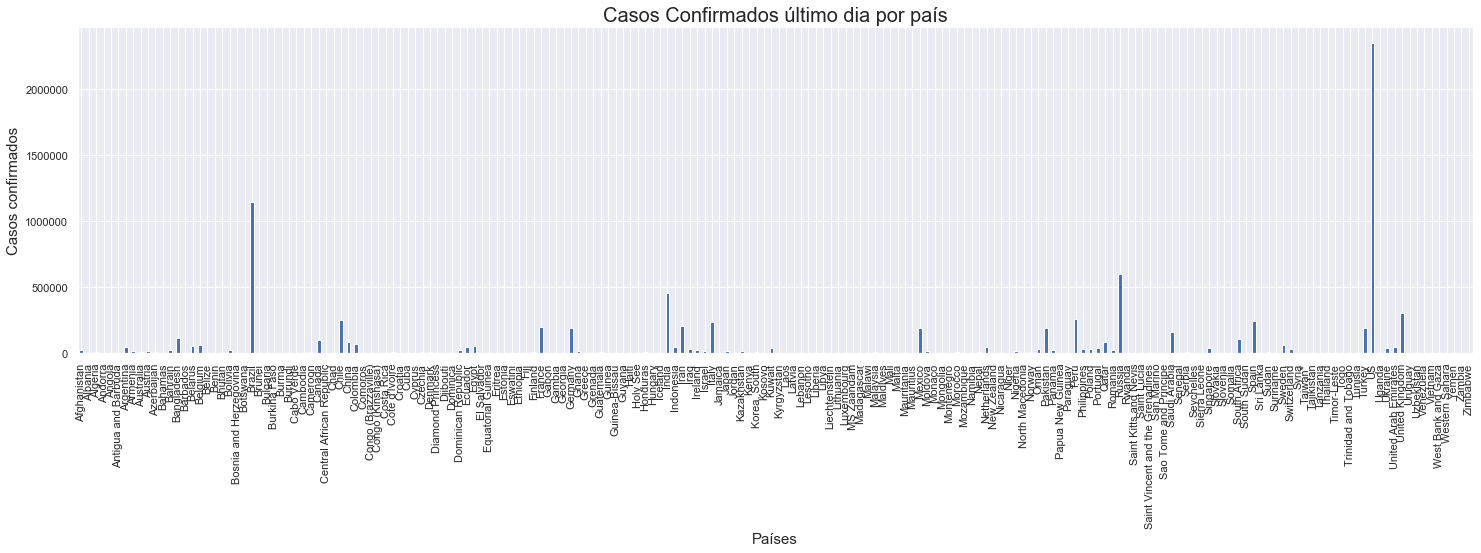

In [47]:
plt.figure(figsize=(25,6))
confirmed_by_country[last_date].plot(kind='bar')
plt.title("Casos Confirmados último dia por país", fontsize=20)
plt.xlabel("Países", fontsize=15)
plt.ylabel("Casos confirmados", fontsize=15)
plt.show()

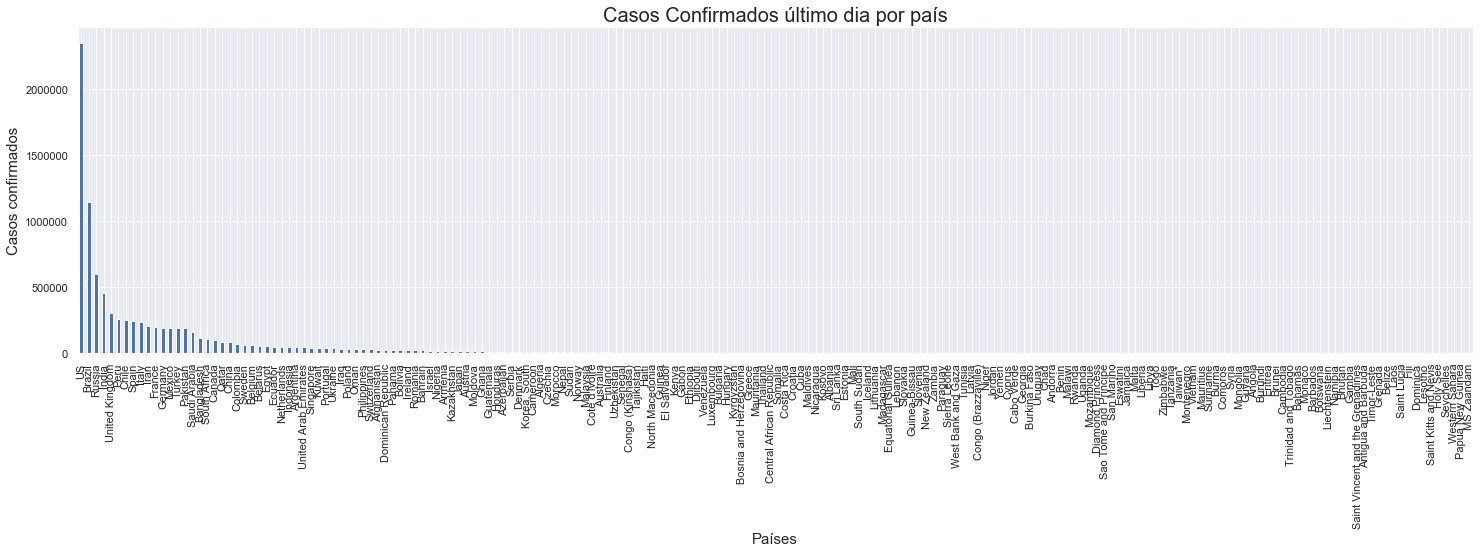

In [48]:
plt.figure(figsize=(25,6))
confirmed_by_country[last_date].sort_values(ascending=False).plot(kind='bar')
plt.title("Casos Confirmados último dia por país", fontsize=20)
plt.xlabel("Países", fontsize=15)
plt.ylabel("Casos confirmados", fontsize=15)
plt.show()

### Como são muitos países e os EUA estão com mais do dobro de casos do 2 lugar (Brasil) - dia 28/05

### Vamos pegar os 10 maiores casos

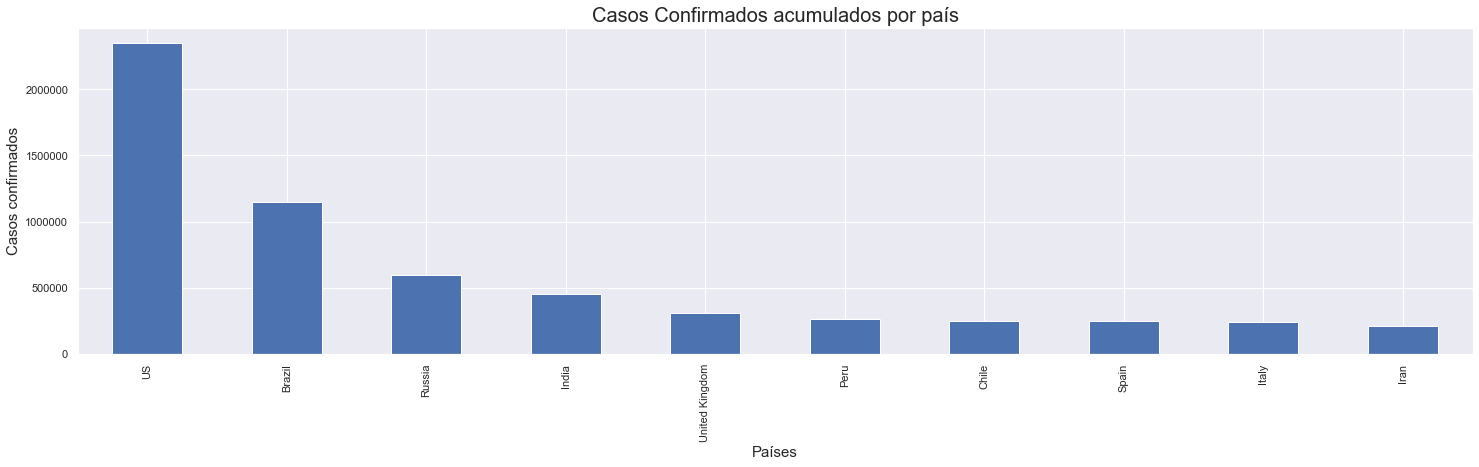

In [49]:
plt.figure(figsize=(25,6))
confirmed_by_country[last_date].sort_values(ascending=False)[:10].plot(kind='bar')
plt.title("Casos Confirmados acumulados por país", fontsize=20)
plt.xlabel("Países", fontsize=15)
plt.ylabel("Casos confirmados", fontsize=15)
plt.show()

### Tirando os EUA, como fica o gráfico?

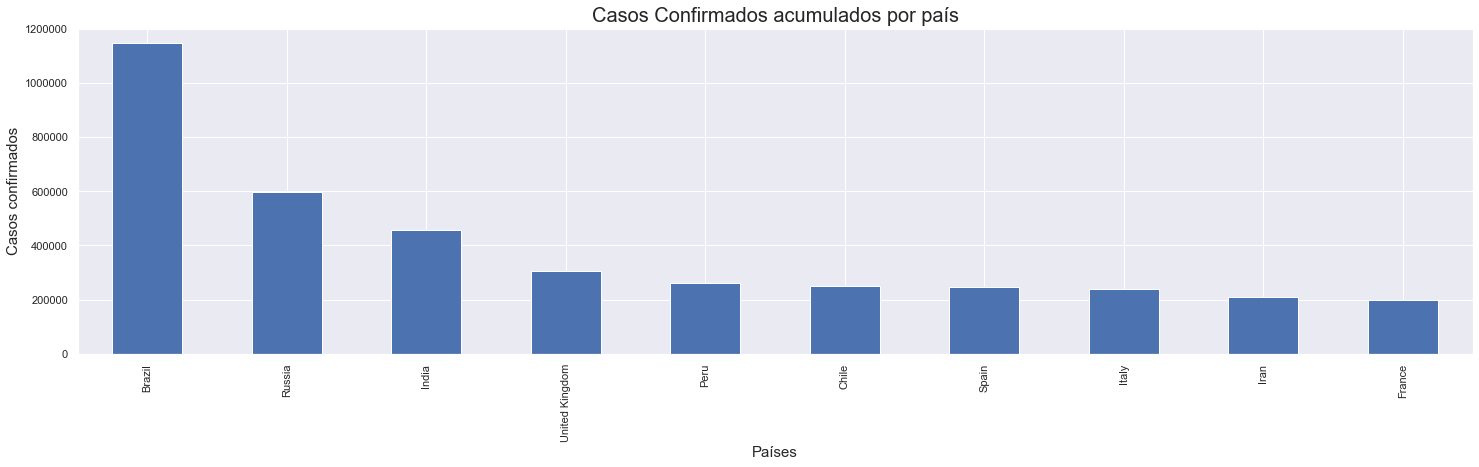

In [50]:
plt.figure(figsize=(25,6))
confirmed_by_country[last_date].sort_values(ascending=False)[1:11].plot(kind='bar')
plt.title("Casos Confirmados acumulados por país", fontsize=20)
plt.xlabel("Países", fontsize=15)
plt.ylabel("Casos confirmados", fontsize=15)
plt.show()

---

# Agora vamos fazer cálculos de mortalidade

Vamos usar os datasets de mortes (deaths) e recuperados (Recovered)

In [51]:
display(deaths.head())
display(recovered.head())

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,471,478,491,504,546,548,569,581,598,618
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,36,36,37,38,39,42,43,44,44,45
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,767,777,788,799,811,825,837,845,852,861
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,51,51,52,52,52,52,52,52,52,52
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,6,6,6,7,8,8,9,9,10,10


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,4725,5164,5508,6158,7660,7962,8292,8764,8841,9260
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1044,1055,1064,1077,1086,1114,1126,1134,1159,1195
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,7606,7735,7842,7943,8078,8196,8324,8422,8559,8674
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,781,789,789,791,792,792,792,792,796,797
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,61,64,64,64,64,66,66,77,77,77


In [52]:
# o iloc funciona com as linhas no primeiro parametro e o segundo, depois da virgula, as colunas

display(confirmed.groupby('Country/Region').sum().iloc[:,-1].head())
#significa que quero todas as linhas e somente a ultima coluna
#funciona igual ao last_date
display(confirmed.groupby('Country/Region').sum()[last_date].head())

Country/Region
Afghanistan    29481
Albania         2047
Algeria        12076
Andorra          855
Angola           189
Name: 6/23/20, dtype: int64

Country/Region
Afghanistan    29481
Albania         2047
Algeria        12076
Andorra          855
Angola           189
Name: 6/23/20, dtype: int64

In [53]:
# fazer uma fórmula para facilitar os próximos passos

def last_day_by_country(data):
    return data.groupby('Country/Region').sum().iloc[:,-1]

In [54]:
last_day_by_country(confirmed).head()

Country/Region
Afghanistan    29481
Albania         2047
Algeria        12076
Andorra          855
Angola           189
Name: 6/23/20, dtype: int64

In [55]:
info_temp = [last_day_by_country(confirmed), last_day_by_country(deaths), last_day_by_country(recovered)]
combined = pd.concat(info_temp, axis=1)
combined

,6/23/20,6/23/20,6/23/20
Country/Region,,,
Afghanistan,29481,618,9260
Albania,2047,45,1195
Algeria,12076,861,8674
Andorra,855,52,797
Angola,189,10,77
...,...,...,...
West Bank and Gaza,1169,3,442
Western Sahara,10,1,8
Yemen,992,261,356


In [56]:
combined.columns = ['confirmed', 'deaths', 'recovered']
combined

,confirmed,deaths,recovered
Country/Region,,,
Afghanistan,29481,618,9260
Albania,2047,45,1195
Algeria,12076,861,8674
Andorra,855,52,797
Angola,189,10,77
...,...,...,...
West Bank and Gaza,1169,3,442
Western Sahara,10,1,8
Yemen,992,261,356


In [57]:
letality_rate_world = combined.deaths.sum() / combined.confirmed.sum()
print(f'A taxa de letalidade mundial do ultimo dia é de {round(letality_rate_world * 100, 4)}%')

A taxa de letalidade mundial do ultimo dia é de 5.1556%


# Considerando os dados, a taxa de mortalidade da COVID-19 no mundo:

In [58]:
letalidade_geral = (deaths.iloc[:,4:].sum().sum()) / (confirmed.iloc[:,4:].sum().sum())
print(f'A taxa de letalidade mundial do ultimo dia é de {round(letalidade_geral * 100, 4)}%')

A taxa de letalidade mundial do ultimo dia é de 6.0974%


In [59]:
# Encontrei que a linha 28 é o Brasil
mortes_brasil = deaths.iloc[28][last_date]
infectados_brasil = confirmed.iloc[28][last_date]
letalidade_brasil = mortes_brasil / infectados_brasil
print(f'A taxa de letalidade no Brasil é de {letalidade_brasil * 100}%.')

A taxa de letalidade no Brasil é de 4.594181372643131%.


In [60]:
# outra forma para encontrar o Brasil
combined[combined.index == 'Brazil']

,confirmed,deaths,recovered
Country/Region,,,
Brazil,1145906,52645,627963


***

# Vamos Fazer a letalidade por país na tabela



## forma de calcular 1:
### número de mortos / número de confirmados

In [61]:
letality_rate_1 = (combined.deaths / combined.confirmed) * 100
combined['letality_rate_1'] = letality_rate_1
combined

,confirmed,deaths,recovered,letality_rate_1
Country/Region,,,,
Afghanistan,29481,618,9260,2.096265
Albania,2047,45,1195,2.198339
Algeria,12076,861,8674,7.129844
Andorra,855,52,797,6.081871
Angola,189,10,77,5.291005
...,...,...,...,...
West Bank and Gaza,1169,3,442,0.256630
Western Sahara,10,1,8,10.000000
Yemen,992,261,356,26.310484


## forma de calcular 2:
### número de mortos / (número de curados + número de mortos)

In [62]:
letality_rate_2 = (combined.deaths / (combined.recovered + combined.deaths)) * 100
combined['letality_rate_2'] = letality_rate_2
combined

,confirmed,deaths,recovered,letality_rate_1,letality_rate_2
Country/Region,,,,,
Afghanistan,29481,618,9260,2.096265,6.256327
Albania,2047,45,1195,2.198339,3.629032
Algeria,12076,861,8674,7.129844,9.029890
Andorra,855,52,797,6.081871,6.124853
Angola,189,10,77,5.291005,11.494253
...,...,...,...,...,...
West Bank and Gaza,1169,3,442,0.256630,0.674157
Western Sahara,10,1,8,10.000000,11.111111
Yemen,992,261,356,26.310484,42.301459


In [63]:
# para saber os com "maior letalidade"
combined.sort_values("letality_rate_1", ascending=False).head(10)

,confirmed,deaths,recovered,letality_rate_1,letality_rate_2
Country/Region,,,,,
Yemen,992,261,356,26.310484,42.301459
MS Zaandam,9,2,0,22.222222,100.000000
Belgium,60810,9713,16771,15.972702,36.674974
France,197804,29723,74995,15.026491,28.383850
Italy,238833,34675,184585,14.518513,15.814558
United Kingdom,307682,43011,1330,13.979043,97.000519
Hungary,4107,573,2600,13.951790,18.058620
Netherlands,49930,6114,186,12.245143,97.047619
Mexico,191410,23377,143646,12.213051,13.996276


Podemos chagar a uma conclusão que esses países não estão testando a população, logo, quem procura o sistema de saúde está em estado mais grave.<br><br>
(hoje, dia 29/05/2020 - com os dados de 28/05):<br>
- Outro ponto são os países MS Zaandam e Antigua and Barbuda que têm poucos casos

### Vou adicionar uma taxa de recuperação

In [64]:
recover_rate = (combined.recovered / combined.confirmed) * 100
combined['recover_rate'] = recover_rate
combined

,confirmed,deaths,recovered,letality_rate_1,letality_rate_2,recover_rate
Country/Region,,,,,,
Afghanistan,29481,618,9260,2.096265,6.256327,31.410061
Albania,2047,45,1195,2.198339,3.629032,58.378114
Algeria,12076,861,8674,7.129844,9.029890,71.828420
Andorra,855,52,797,6.081871,6.124853,93.216374
Angola,189,10,77,5.291005,11.494253,40.740741
...,...,...,...,...,...,...
West Bank and Gaza,1169,3,442,0.256630,0.674157,37.810094
Western Sahara,10,1,8,10.000000,11.111111,80.000000
Yemen,992,261,356,26.310484,42.301459,35.887097


In [65]:
# vamos ver o Brasil
combined[combined.index == 'Brazil']

,confirmed,deaths,recovered,letality_rate_1,letality_rate_2,recover_rate
Country/Region,,,,,,
Brazil,1145906,52645,627963,4.594181,7.734996,54.800568


In [66]:
combined.loc['Brazil']

confirmed          1.145906e+06
deaths             5.264500e+04
recovered          6.279630e+05
letality_rate_1    4.594181e+00
letality_rate_2    7.734996e+00
recover_rate       5.480057e+01
Name: Brazil, dtype: float64

### Maiores taxas de recuperação

In [67]:
# para saber os com "maior letalidade"
combined.sort_values("recover_rate", ascending=False).head(10)

,confirmed,deaths,recovered,letality_rate_1,letality_rate_2,recover_rate
Country/Region,,,,,,
Laos,19,0,19,0.000000,0.000000,100.000000
Seychelles,11,0,11,0.000000,0.000000,100.000000
Timor-Leste,24,0,24,0.000000,0.000000,100.000000
Grenada,23,0,23,0.000000,0.000000,100.000000
Holy See,12,0,12,0.000000,0.000000,100.000000
Fiji,18,0,18,0.000000,0.000000,100.000000
Saint Kitts and Nevis,15,0,15,0.000000,0.000000,100.000000
Dominica,18,0,18,0.000000,0.000000,100.000000
Iceland,1824,10,1806,0.548246,0.550661,99.013158


---

## Análise gráfica dos dados combinados

In [68]:
# sns.set(style="ticks", color_codes=True) modelo padrão
sns.set()

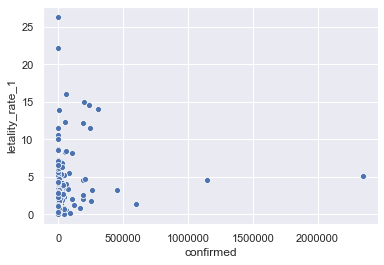

In [69]:
# primiro gráfico
sns.scatterplot(data= combined, x= 'confirmed', y= 'letality_rate_1')

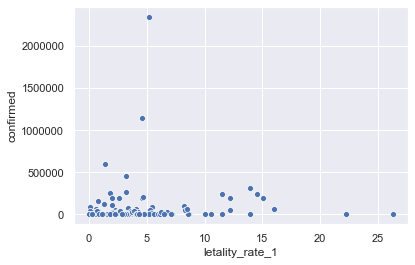

In [70]:
# invertendo os eixos
sns.scatterplot(data= combined, x= 'letality_rate_1', y= 'confirmed')

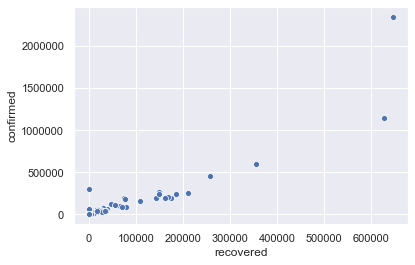

In [71]:
# Recuperados
sns.scatterplot(data= combined, x= 'recovered', y= 'confirmed')

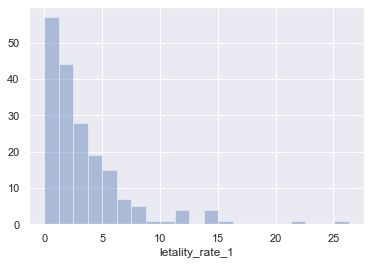

In [72]:
sns.distplot(combined['letality_rate_1'], kde=False)

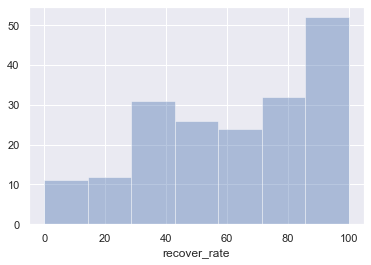

In [73]:
sns.distplot(combined['recover_rate'], kde=False)

---

### Para um calculo mais preciso de taxa de mortalidade e de recuperação, o valor de confirmados tem que ser de aproximadamente 12 dias antes, mas para o cálculo de mortalidade o cálculo será: 
#### taxa de mortalidade = mortes / (mortes + curados)
#### conforme estudos publicados. American Journal of Epidemiology study

---

## Análise de mortes por dia

In [74]:
new_daths_brazil = death_by_country.loc["Brazil"][2:].diff().dropna()
new_daths_brazil

1/23/20       0.0
1/24/20       0.0
1/25/20       0.0
1/26/20       0.0
1/27/20       0.0
            ...  
6/19/20    1206.0
6/20/20    1022.0
6/21/20     615.0
6/22/20     680.0
6/23/20    1374.0
Name: Brazil, Length: 153, dtype: float64

In [75]:
new_daths_brazil.tail(10)

6/14/20     612.0
6/15/20     627.0
6/16/20    1282.0
6/17/20    1269.0
6/18/20    1238.0
6/19/20    1206.0
6/20/20    1022.0
6/21/20     615.0
6/22/20     680.0
6/23/20    1374.0
Name: Brazil, dtype: float64

In [76]:
new_daths_usa = death_by_country.loc["US"][2:].diff().dropna()
new_daths_usa

1/23/20      0.0
1/24/20      0.0
1/25/20      0.0
1/26/20      0.0
1/27/20      0.0
           ...  
6/19/20    692.0
6/20/20    596.0
6/21/20    259.0
6/22/20    423.0
6/23/20    826.0
Name: US, Length: 153, dtype: float64

In [77]:
new_daths_usa.tail(10)

6/14/20    296.0
6/15/20    395.0
6/16/20    836.0
6/17/20    754.0
6/18/20    715.0
6/19/20    692.0
6/20/20    596.0
6/21/20    259.0
6/22/20    423.0
6/23/20    826.0
Name: US, dtype: float64

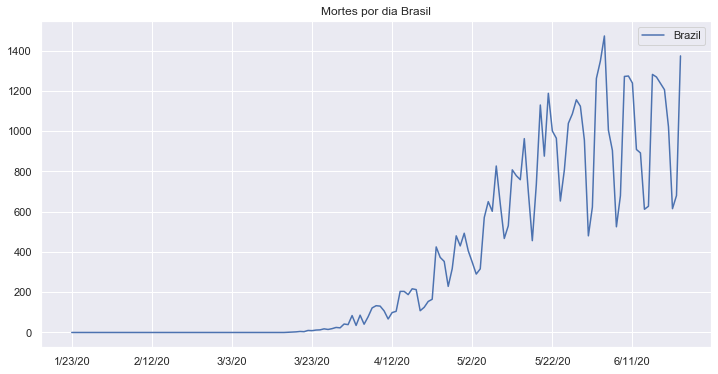

In [78]:
plt.figure(figsize=(12,6))
new_daths_brazil.plot()
plt.title("Mortes por dia Brasil")
plt.legend()
plt.show()

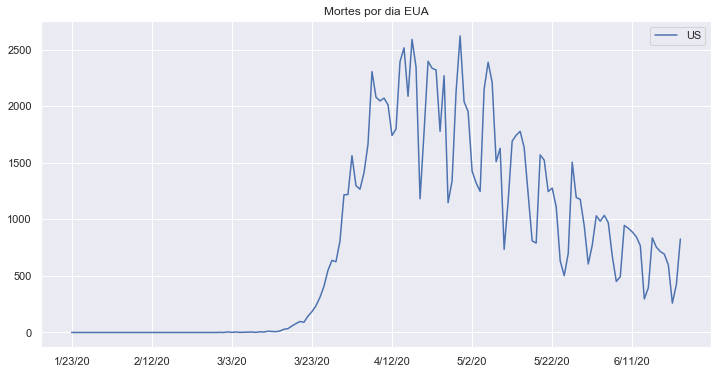

In [79]:
plt.figure(figsize=(12,6))
new_daths_usa.plot()
plt.title("Mortes por dia EUA")
plt.legend()
plt.show()

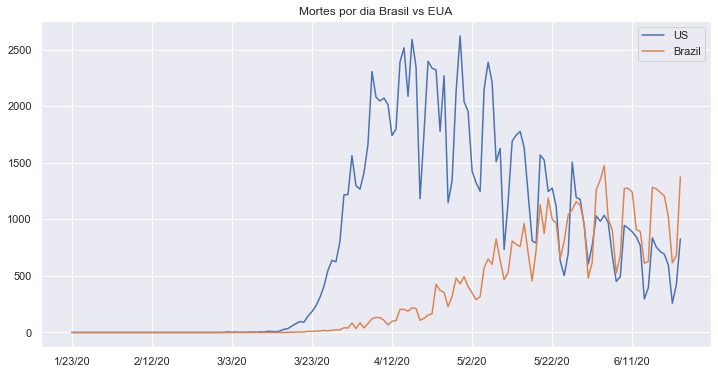

In [80]:
plt.figure(figsize=(12,6))
new_daths_usa.plot()
new_daths_brazil.plot()
plt.title("Mortes por dia Brasil vs EUA")
plt.legend()
plt.show()

---

# Segunda parte

## Itens avaliados nos vídeos da primeira aula

### - Continuação dos gráficos do curso anterior, comparando a China com o resto do mundo.
####   OBS: O vídeo foi gravado no início de março e China era epicentro do COVID

###  - Análise de boletins e resumos epidemiológicos dos estados

***

<h2>Uma gambiarra/artifício para fazer um gráfico comparativo de um país com os demais</h2>

In [81]:
#maneira de usar o país que é indice para mostrar somente ele
confirmed.set_index("Country/Region").loc["China"]

,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
China,Anhui,31.8257,117.2264,1,9,15,39,60,70,106,...,991,991,991,991,991,991,991,991,991,991
China,Beijing,40.1824,116.4142,14,22,36,41,68,80,91,...,673,700,731,752,777,777,821,830,843,850
China,Chongqing,30.0572,107.8740,6,9,27,57,75,110,132,...,582,582,582,582,582,582,582,582,582,582
China,Fujian,26.0789,117.9874,1,5,10,18,35,59,80,...,362,362,362,362,362,362,363,363,363,363
China,Gansu,37.8099,101.0583,0,2,2,4,7,14,19,...,139,139,149,150,151,151,151,151,158,158
China,Guangdong,23.3417,113.4244,26,32,53,78,111,151,207,...,1625,1628,1628,1628,1631,1631,1634,1634,1634,1634
China,Guangxi,23.8298,108.7881,2,5,23,23,36,46,51,...,254,254,254,254,254,254,254,254,254,254
China,Guizhou,26.8154,106.8748,1,3,3,4,5,7,9,...,147,147,147,147,147,147,147,147,147,147
China,Hainan,19.1959,109.7453,4,5,8,19,22,33,40,...,171,171,171,171,171,171,171,171,171,171


In [82]:
# como a China é separada em muitas regiões, fazemos isso para somar pelos dias(colunas)
confirmed.set_index("Country/Region").loc["China"].sum()

Province/State    AnhuiBeijingChongqingFujianGansuGuangdongGuang...
Lat                                                         1083.34
Long                                                        3684.42
1/22/20                                                         548
1/23/20                                                         643
                                        ...                        
6/19/20                                                       84494
6/20/20                                                       84553
6/21/20                                                       84572
6/22/20                                                       84624
6/23/20                                                       84653
Length: 157, dtype: object

### Vou testar com os EUA, são grande e o epicentro atual (01/06/2020)

In [83]:
confirmed.set_index("Country/Region").loc["US"]

Province/State        NaN
Lat               37.0902
Long             -95.7129
1/22/20                 1
1/23/20                 1
                   ...   
6/19/20           2222579
6/20/20           2255297
6/21/20           2281655
6/22/20           2312302
6/23/20           2347022
Name: US, Length: 157, dtype: object

In [84]:
# Como os EUA não é separado por região como a china, só precisa separar no primeiro passo
confirmed.set_index("Country/Region").loc["US"]

Province/State        NaN
Lat               37.0902
Long             -95.7129
1/22/20                 1
1/23/20                 1
                   ...   
6/19/20           2222579
6/20/20           2255297
6/21/20           2281655
6/22/20           2312302
6/23/20           2347022
Name: US, Length: 157, dtype: object

In [85]:
# para mostrar uma maneira de trabalhar com muitas linhas seria criando uma coluna com TRUE ou FALSE
is_china = confirmed["Country/Region"] == "China"
confirmed["is_china"] = is_china
display(confirmed.head())
display(confirmed.tail())

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,is_china
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,25527,26310,26874,27532,27878,28424,28833,29157,29481,False
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1590,1672,1722,1788,1838,1891,1962,1995,2047,False
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,11031,11147,11268,11385,11504,11631,11771,11920,12076,False
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,853,854,854,855,855,855,855,855,855,False
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,142,148,155,166,172,176,183,186,189,False


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,is_china
261,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,662,671,683,688,693,698,698,702,707,False
262,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,844,885,902,909,919,922,941,967,992,False
263,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,...,176,197,197,210,210,247,247,247,265,False
264,NaN,Tajikistan,38.861034,71.276093,0,0,0,0,0,0,...,5097,5160,5221,5279,5338,5399,5457,5513,5567,False
265,NaN,Lesotho,-29.609988,28.233608,0,0,0,0,0,0,...,4,4,4,4,4,4,4,12,17,False


In [86]:
# query só para a china
confirmed.query("is_china")

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,is_china
49,Anhui,China,31.8257,117.2264,1,9,15,39,60,70,...,991,991,991,991,991,991,991,991,991,True
50,Beijing,China,40.1824,116.4142,14,22,36,41,68,80,...,700,731,752,777,777,821,830,843,850,True
51,Chongqing,China,30.0572,107.8740,6,9,27,57,75,110,...,582,582,582,582,582,582,582,582,582,True
52,Fujian,China,26.0789,117.9874,1,5,10,18,35,59,...,362,362,362,362,362,363,363,363,363,True
53,Gansu,China,37.8099,101.0583,0,2,2,4,7,14,...,139,149,150,151,151,151,151,158,158,True
54,Guangdong,China,23.3417,113.4244,26,32,53,78,111,151,...,1628,1628,1628,1631,1631,1634,1634,1634,1634,True
55,Guangxi,China,23.8298,108.7881,2,5,23,23,36,46,...,254,254,254,254,254,254,254,254,254,True
56,Guizhou,China,26.8154,106.8748,1,3,3,4,5,7,...,147,147,147,147,147,147,147,147,147,True
57,Hainan,China,19.1959,109.7453,4,5,8,19,22,33,...,171,171,171,171,171,171,171,171,171,True
58,Hebei,China,39.5490,116.1306,1,1,2,8,13,18,...,335,336,338,340,340,344,346,346,348,True


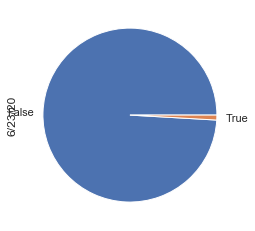

In [87]:
# um gráfico comparativo de todos contra a China
confirmed.groupby("is_china").sum()[last_date].plot(kind='pie')

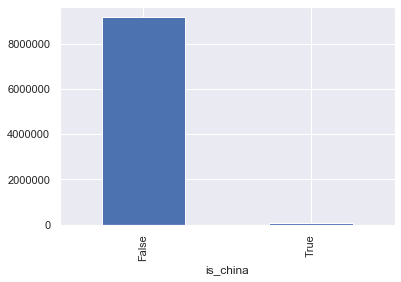

In [88]:
confirmed.groupby("is_china").sum()[last_date].plot(kind='bar')

*** Teste com os EUA ***

In [89]:
is_usa = confirmed["Country/Region"] == "US"
confirmed["is_usa"] = is_usa
confirmed.query("is_usa")

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,is_china,is_usa
225,NaN,US,37.0902,-95.7129,1,1,2,2,5,5,...,2137731,2163290,2191052,2222579,2255297,2281655,2312302,2347022,False,True


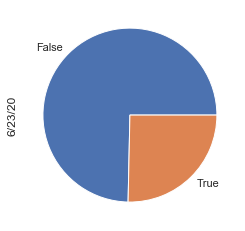

In [90]:
confirmed.groupby("is_usa").sum()[last_date].plot(kind='pie')

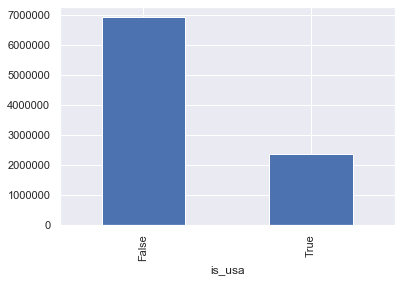

In [91]:
confirmed.groupby("is_usa").sum()[last_date].plot(kind='bar')

***

In [92]:
# Maneira de Fazer uma coluna condicional, quando é TRUE, a coluna vai ter 'China', senão 'Others'
import numpy as np

confirmed['is_china_label'] = np.where(confirmed["is_china"], 'China', 'Others')

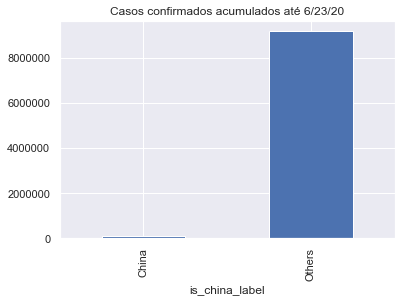

In [93]:
confirmed.groupby("is_china_label").sum()[last_date].plot(kind='bar')
plt.title(f"Casos confirmados acumulados até {last_date}")
plt.show()

In [94]:
# fonte de dados de população mundial:
# https://www.worldometers.info/world-population/population-by-country/
population_usa = 331002651
cases = confirmed_by_country.loc["US"][last_date]
incidence_ratio = cases / population_usa
print(f'A taxa de incidência do COVID nos EUA é de {(incidence_ratio * 100000)} a cada 100.000 mil habitantes')

A taxa de incidência do COVID nos EUA é de 709.0644116925819 a cada 100.000 mil habitantes


In [95]:
population_br = 212559417
cases_br = confirmed_by_country.loc["Brazil"][last_date]
incidence_ratio_br = cases / population_br

print(f'A taxa de incidência do COVID no Brasil é de {(incidence_ratio_br * 100000)} a cada 100.000 mil habitantes')

A taxa de incidência do COVID no Brasil é de 1104.1722042359572 a cada 100.000 mil habitantes


## Fonte de dados de população mundial:
### Nações Unidas - UN
site: https://population.un.org/wpp/Download/Standard/Population/

In [96]:
population_un = pd.read_csv('https://population.un.org/wpp/Download/Files/1_Indicators%20(Standard)/CSV_FILES/WPP2019_TotalPopulationBySex.csv')
population_un

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
0,4,Afghanistan,2,Medium,1950,1950.5,4099.243,3652.874,7752.117,11.874
1,4,Afghanistan,2,Medium,1951,1951.5,4134.756,3705.395,7840.151,12.009
2,4,Afghanistan,2,Medium,1952,1952.5,4174.450,3761.546,7935.996,12.156
3,4,Afghanistan,2,Medium,1953,1953.5,4218.336,3821.348,8039.684,12.315
4,4,Afghanistan,2,Medium,1954,1954.5,4266.484,3884.832,8151.316,12.486
...,...,...,...,...,...,...,...,...,...,...
280927,716,Zimbabwe,207,Lower 95 PI,2080,2080.5,10576.533,11255.983,21836.893,56.448
280928,716,Zimbabwe,207,Lower 95 PI,2085,2085.5,10293.349,11050.875,21355.988,55.205
280929,716,Zimbabwe,207,Lower 95 PI,2090,2090.5,9920.336,10767.709,20689.956,53.483
280930,716,Zimbabwe,207,Lower 95 PI,2095,2095.5,9503.711,10412.184,19892.080,51.421


---

## Fonte de indicadores de saúde:
### site da Organização mundial de saúde:
https://www.paho.org/bra/index.php?option=com_content&view=featured&Itemid=101

Existe um livro com 350 páginas com os conceitos e aplicações dos indicadores básicos no Brasil
link: https://www.paho.org/bra/index.php?option=com_docman&view=download&category_slug=informacao-e-analise-saude-096&alias=89-indicadores-basicos-para-a-saude-no-brasil-conceitos-e-aplicacoes-livro-2a-edicao-2008-9&Itemid=965

***